## Questão 3

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score, mean_absolute_error


data_treino = pd.read_csv('base_treinamento.csv')
data_test = pd.read_csv('base_teste.csv')

### Verificando ausência de dados

In [30]:
data_treino.isnull().sum()

AP1             0
AP2             0
AP3             0
AP4             0
AP5             0
Coordenada X    0
Coordenada Y    0
dtype: int64

In [31]:
df = pd.DataFrame(data_treino)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,AP1,AP2,AP3,AP4,AP5,Coordenada X,Coordenada Y
AP1,1,0.24,-0.58,-0.48,0.75,-0.73,0.68
AP2,0.24,1,-0.0096,-0.55,0.29,0.31,0.54
AP3,-0.58,-0.0096,1,0.26,-0.52,0.64,-0.38
AP4,-0.48,-0.55,0.26,1,-0.34,0.011,-0.78
AP5,0.75,0.29,-0.52,-0.34,1,-0.54,0.68
Coordenada X,-0.73,0.31,0.64,0.011,-0.54,1,-0.24
Coordenada Y,0.68,0.54,-0.38,-0.78,0.68,-0.24,1


### Analisando a matriz de correlação, podemos notar algumas colunas com correlação alta, porém achamos desnecessário a juntar as duas 


### Removendo dados duplicados

In [32]:
data_treino = data_treino.drop_duplicates(None, 'first')

In [33]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 7 columns):
AP1             262 non-null int64
AP2             262 non-null int64
AP3             262 non-null int64
AP4             262 non-null int64
AP5             262 non-null int64
Coordenada X    262 non-null float64
Coordenada Y    262 non-null float64
dtypes: float64(2), int64(5)
memory usage: 16.4 KB


### Verificando a presença de *outliers* por meio do *boxplot* 

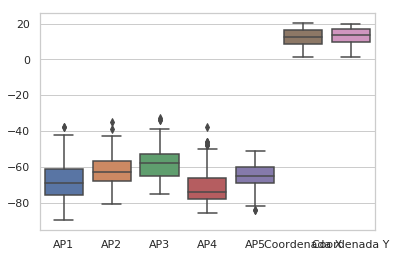

In [34]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=data_treino);

### Organizando os dados de teste e treinamento

#### Os dados foram serão reorganizados, de modo que, a segunda linha dos dados AP1 até AP5 , seja a entrada das colunas de saída, assim simulando um tipo de memória. Similar a movimentação de um robô.

#### Primeiramente dividimos em dois bancos, um com as duas colunas de coordenadas X e Y, as quais não terão alteração. E outro com as colunas de AP1 até AP5, que são as colunas com necessidade da remição da primeira linha, para que possamos juntar novamente os dois bancos em um só, assim gerando um banco reorganização do modo explicado acima

In [35]:
X_train = data_treino.iloc[:,:5]
y_train = data_treino.iloc[:-1,5:]
X_test = data_test.iloc[:,:5]
y_test = data_test.iloc[:-1,5:]

In [36]:
print(y_train)

     Coordenada X  Coordenada Y
0            1.47         19.44
1            2.48         19.54
2            3.44         19.54
3            4.48         19.54
4            5.44         19.54
5            6.41         19.54
6            7.41         19.63
7            8.50         19.54
8            9.42         19.63
9           10.42         19.58
10          11.46         19.54
11          12.42         19.58
12          13.51         19.44
13          14.43         19.54
14          15.48         19.58
15          16.48         19.54
16          17.40         19.58
17          18.40         19.49
18          19.45         19.54
19          20.45         19.58
20          20.41         18.53
21          19.45         18.58
22          18.44         18.58
23          17.40         18.58
24          16.48         18.58
25          15.43         18.58
26          14.47         18.48
27          13.43         18.58
28          12.38         18.58
29          11.46         18.63
..      

### Removendo a primeira linha das colunas de AP1 até AP5, dos datasets de treinamento e teste

In [37]:
X_train.drop(0,axis=0, inplace=True)
X_test.drop(0,axis=0, inplace=True)

### Resetando o índice das linhas, para que voltem a ser numeradas de a partir de zero

In [38]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [39]:
print(X_train)

     AP1  AP2  AP3  AP4  AP5
0    -42  -69  -62  -78  -59
1    -56  -71  -61  -85  -61
2    -54  -72  -63  -77  -60
3    -58  -69  -64  -81  -63
4    -63  -70  -62  -76  -65
5    -61  -74  -58  -75  -59
6    -59  -66  -65  -80  -57
7    -59  -68  -60  -77  -55
8    -65  -69  -62  -80  -65
9    -61  -64  -67  -76  -61
10   -63  -60  -53  -75  -63
11   -66  -65  -54  -75  -64
12   -70  -64  -55  -80  -60
13   -69  -58  -56  -85  -63
14   -73  -65  -52  -80  -62
15   -68  -49  -52  -81  -57
16   -72  -43  -55  -76  -54
17   -69  -39  -57  -84  -59
18   -72  -44  -64  -85  -60
19   -70  -35  -56  -82  -63
20   -72  -43  -59  -83  -67
21   -72  -45  -55  -79  -65
22   -74  -47  -54  -73  -64
23   -71  -51  -52  -76  -63
24   -67  -50  -54  -72  -59
25   -69  -56  -63  -80  -66
26   -65  -59  -59  -79  -60
27   -67  -64  -66  -83  -65
28   -67  -64  -61  -76  -59
29   -65  -65  -63  -76  -66
..   ...  ...  ...  ...  ...
231  -80  -68  -56  -58  -71
232  -78  -75  -56  -63  -67
233  -74  -73 

### Juntando os dados, após a reorganização. Agora a linha que antes era a segunda linha de entrada, passa a ser a primeira.

In [40]:
X_train ['X'] = y_train['Coordenada X']
X_train ['Y'] = y_train['Coordenada Y']

X_test ['X'] = y_test['Coordenada X']
X_test ['Y'] = y_test['Coordenada Y']

print(X_train)

     AP1  AP2  AP3  AP4  AP5      X      Y
0    -42  -69  -62  -78  -59   1.47  19.44
1    -56  -71  -61  -85  -61   2.48  19.54
2    -54  -72  -63  -77  -60   3.44  19.54
3    -58  -69  -64  -81  -63   4.48  19.54
4    -63  -70  -62  -76  -65   5.44  19.54
5    -61  -74  -58  -75  -59   6.41  19.54
6    -59  -66  -65  -80  -57   7.41  19.63
7    -59  -68  -60  -77  -55   8.50  19.54
8    -65  -69  -62  -80  -65   9.42  19.63
9    -61  -64  -67  -76  -61  10.42  19.58
10   -63  -60  -53  -75  -63  11.46  19.54
11   -66  -65  -54  -75  -64  12.42  19.58
12   -70  -64  -55  -80  -60  13.51  19.44
13   -69  -58  -56  -85  -63  14.43  19.54
14   -73  -65  -52  -80  -62  15.48  19.58
15   -68  -49  -52  -81  -57  16.48  19.54
16   -72  -43  -55  -76  -54  17.40  19.58
17   -69  -39  -57  -84  -59  18.40  19.49
18   -72  -44  -64  -85  -60  19.45  19.54
19   -70  -35  -56  -82  -63  20.45  19.58
20   -72  -43  -59  -83  -67  20.41  18.53
21   -72  -45  -55  -79  -65  19.45  18.58
22   -74  -

### Verificando o balanceamento das classes de saída Coordenada X e Y

/home/curty/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


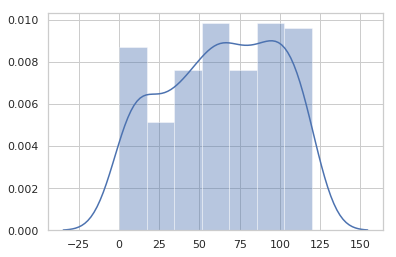

In [41]:
hist_dataset = y_train['Coordenada X']
hist_dataset = pd.Categorical(hist_dataset).codes
sns.distplot(hist_dataset)


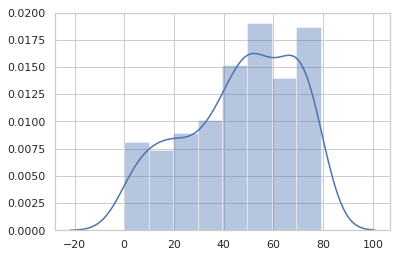

In [42]:
hist_dataset = y_train['Coordenada Y']
hist_dataset = pd.Categorical(hist_dataset).codes
sns.distplot(hist_dataset)

In [43]:
y_test = y_test.as_matrix()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### Normalizando 

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X_train)
scaler.fit(X_test)

/home/curty/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/curty/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

### Como especificado na questão, " para calcular o erro médio da predição da localização nos pontos da base de testes utilize a fórmula da hipotenusa" . As saídas com nome *Média* foram calculados com a fórmula da hipotenusa


### Utilizamos a função *RegBay* para receber os algoritmos e printar os gráficos

In [45]:
from sklearn.multioutput import MultiOutputRegressor

def RegBay(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo())
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")

### Primeiro algoritmo *KNN* 

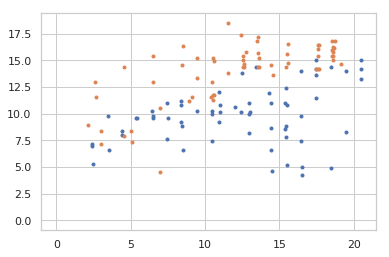

0.11678983688849037
3.7569687499999995  Mean Absolute Error


In [47]:
from sklearn.neighbors import KNeighborsRegressor

    
RegBay(KNeighborsRegressor,X_train,y_train,X_test,y_test)

### Segundo algoritmo *RandomForest*

/home/curty/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/curty/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


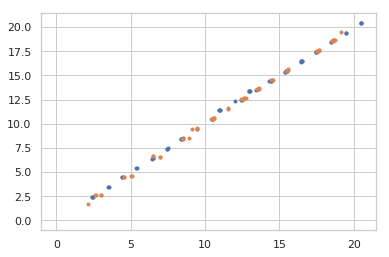

0.9990318811957561
0.08235156250000028  Mean Absolute Error


In [46]:
from sklearn.ensemble import RandomForestRegressor
RegBay(RandomForestRegressor,X_train,y_train,X_test,y_test)

### Bônus: Utilizando rede neural 

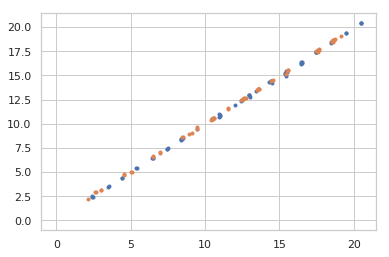

0.9995904231595704
0.05862876681175487  Mean Absolute Error


In [51]:
from sklearn.neural_network import MLPRegressor

def RegBay(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo(activation='relu',solver='lbfgs',hidden_layer_sizes=(100,100),random_state = 10))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")

RegBay(MLPRegressor,X_train,y_train,X_test,y_test)

### Diante dos dos gráficos, podemos ver que os que se saíram melhor, foram os algoritmos KNN e a Rede Neural